<a href="https://colab.research.google.com/github/pabhijeet99/Excelr_DS_Assignments/blob/main/MultiLinear_Regression_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case** :
Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

**R&D Spend** -- Research and devolop spend in the past few years Administration -- spend on administration in the past few years Marketing Spend -- spend on Marketing in the past few years State -- states from which data is collected Profit -- profit of each state in the past few year

*A. IMPORT LIBRARIES*

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')


*B. IMPORT DATA*

In [3]:
startup=pd.read_csv("/content/50_Startups.csv")
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


*C. DATA UNDERSTANDING*

In [7]:
startup.shape

(50, 5)

In [8]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

DATA CLEANING

In [11]:
startup['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

We can better go with One Hot Encoding Method as the input feature '**State**' is *parametric*

In [12]:
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder(sparse=False)
OHE_results=pd.DataFrame(OHE.fit_transform(startup[['State']]),columns=('State_New_York','State_California','State_Florida'))

In [13]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
startup=startup.join(OHE_results)

In [15]:
del startup['State']

In [16]:
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_New_York,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [18]:
startup.rename({'R&D Spend':'R&D_Spending','Marketing Spend':'Marketing_Spend'},axis=1,inplace=True)

In [19]:
startup.head()

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


CHECK ASSUMPTION TEST

In [20]:
#LINEARITY CHECK

In [21]:
startup.columns

Index(['R&D_Spending', 'Administration', 'Marketing_Spend', 'Profit',
       'State_New_York', 'State_California', 'State_Florida'],
      dtype='object')

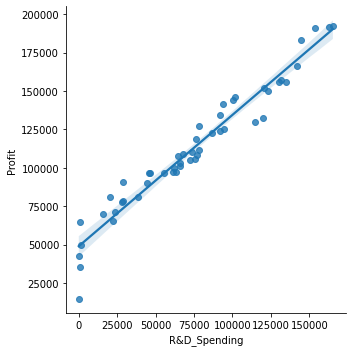

In [22]:
sns.lmplot(x='R&D_Spending',y='Profit',data=startup)
plt.show()

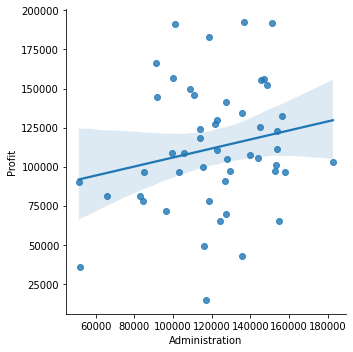

In [24]:
sns.lmplot(x='Administration',y='Profit',data=startup)
plt.show()

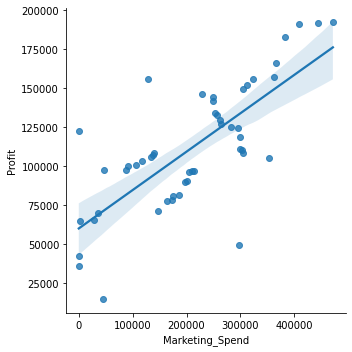

In [25]:
sns.lmplot(x='Marketing_Spend',y='Profit',data=startup)
plt.show()

Features **R&D Spend** and **State** have passed the *Linearity Test*

In [26]:
#Normality Test

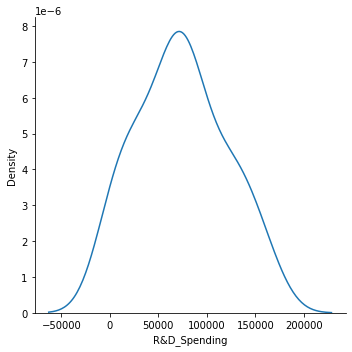

In [27]:
sns.displot(data=startup,x='R&D_Spending',kind='kde')
plt.show()

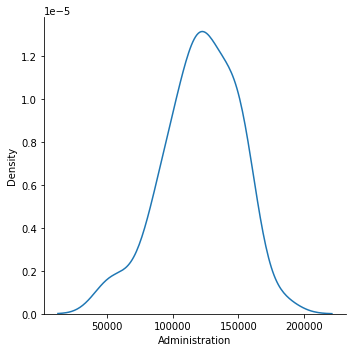

In [28]:
sns.displot(data=startup,x='Administration',kind='kde')
plt.show()

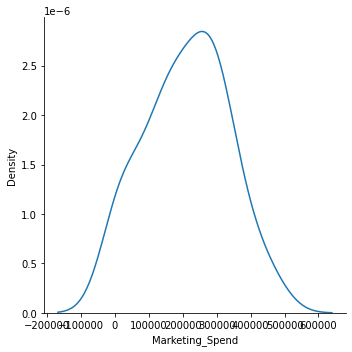

In [29]:
sns.displot(data=startup,x='Marketing_Spend',kind='kde')
plt.show()

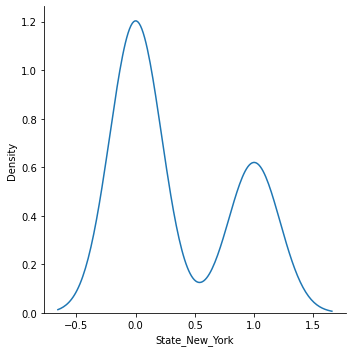

In [30]:
sns.displot(data=startup,x='State_New_York',kind='kde')
plt.show()

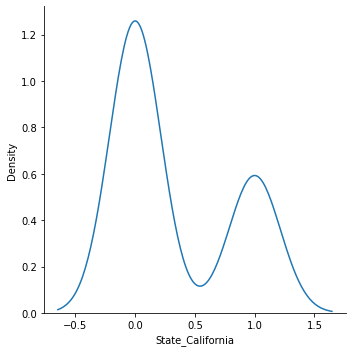

In [31]:
sns.displot(data=startup,x='State_California',kind='kde')
plt.show()

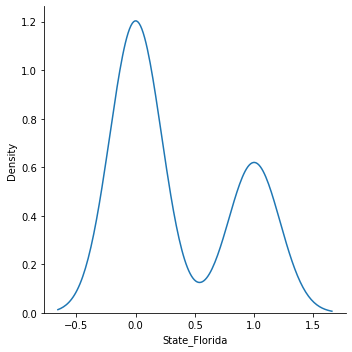

In [32]:
sns.displot(data=startup,x='State_Florida',kind='kde')
plt.show()

The Normality Test has been failed.

In [33]:
#Normality test using QQ plot

In [34]:
from scipy import stats

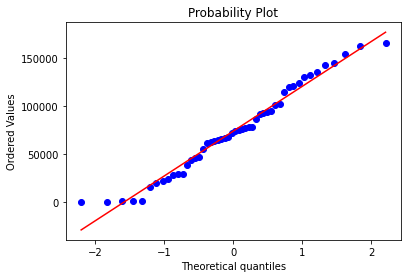

In [35]:
stats.probplot(startup['R&D_Spending'],plot=plt)
plt.show()

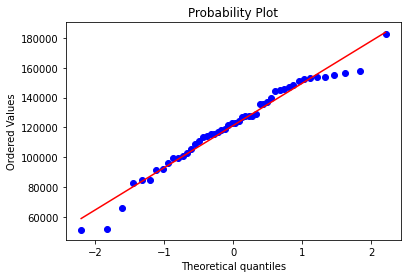

In [36]:
stats.probplot(startup['Administration'],plot=plt)
plt.show()

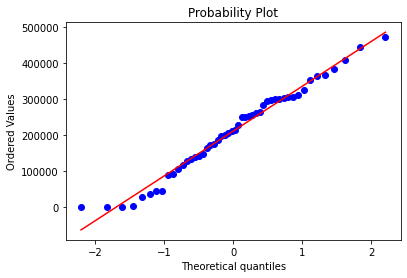

In [37]:
stats.probplot(startup['Marketing_Spend'],plot=plt)
plt.show()

Normality Test has again been failed

*MULTICOLLINEARITY TEST*

In [38]:
#1.corr()
#2.VIF

In [39]:
startup.corr().round(2)

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida
R&D_Spending,1.00,0.24,0.72,0.97,-0.14,0.11,0.04
Administration,0.24,1.00,-0.03,0.20,-0.02,0.01,0.01
Marketing_Spend,0.72,-0.03,1.00,0.75,-0.17,0.21,-0.03
Profit,0.97,0.20,0.75,1.00,-0.15,0.12,0.03
State_New_York,-0.14,-0.02,-0.17,-0.15,1.00,-0.49,-0.52
State_California,0.11,0.01,0.21,0.12,-0.49,1.00,-0.49
State_Florida,0.04,0.01,-0.03,0.03,-0.52,-0.49,1.00


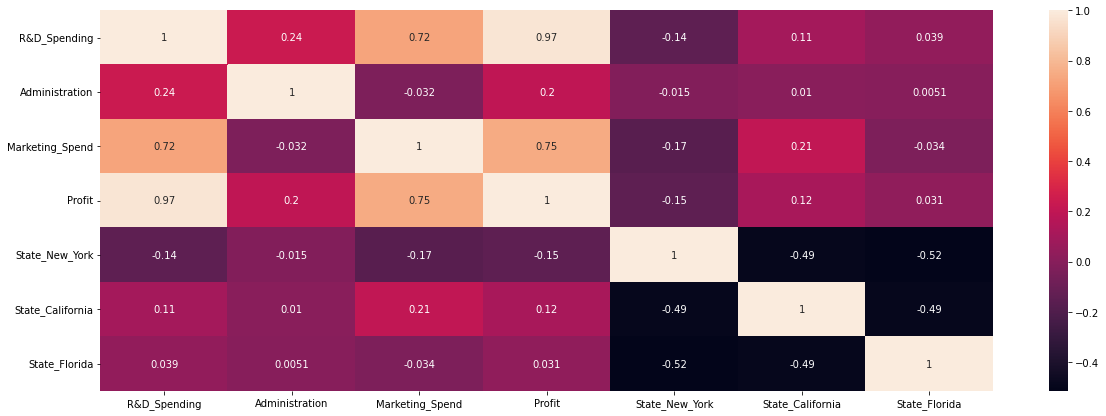

In [40]:
plt.figure(figsize=(20,7))
sns.heatmap(startup.corr(),annot=True)
plt.show()

**Multicollinearity Test has been failed as there is Multicollinearity (R&D Spending vs Marketing Spend)**

NO AUTO REGRESSION

There is no time based input feature. Hence there is no auto regression.

# ***EDA***

Box Plot - Outlier Detection

In [41]:
startup.columns

Index(['R&D_Spending', 'Administration', 'Marketing_Spend', 'Profit',
       'State_New_York', 'State_California', 'State_Florida'],
      dtype='object')

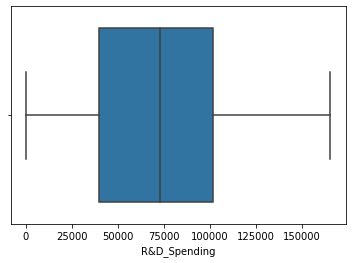

In [43]:
sns.boxplot(x='R&D_Spending',data=startup)
plt.show()

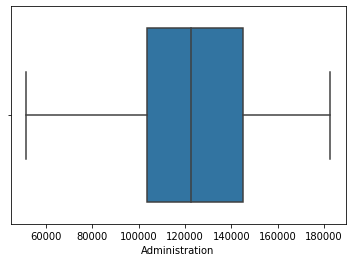

In [45]:
sns.boxplot(x='Administration',data=startup)
plt.show()

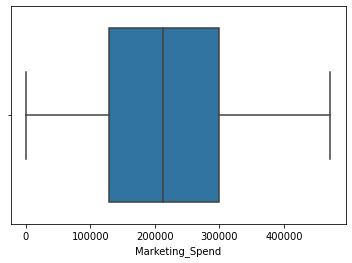

In [46]:
sns.boxplot(x='Marketing_Spend',data=startup)
plt.show()

**There are no Outliers in the Data**

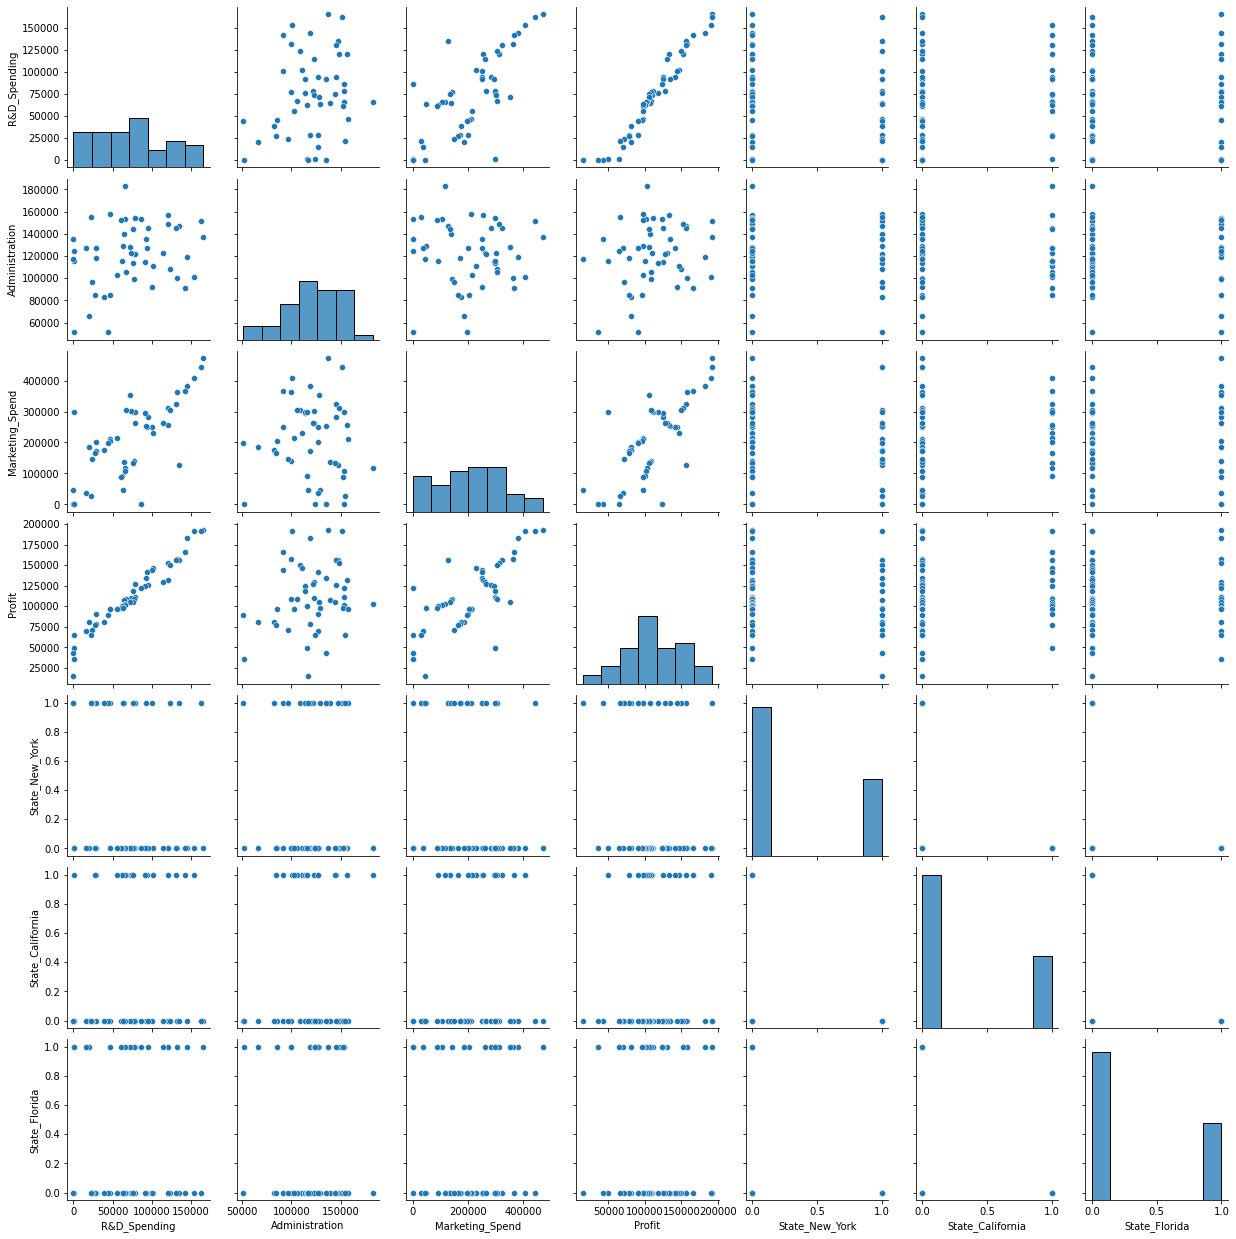

In [47]:
sns.pairplot(startup)
plt.show()

***D. MODEL BUILDING***

In [48]:
X=startup.drop('Profit',axis=1)
y=startup[['Profit']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12,shuffle=True)

***E. MODEL TRAINING***

In [49]:
from sklearn.linear_model import LinearRegression
startup_model=LinearRegression().fit(X,y)

***F. MODEL TESTING AND MODEL EVALUATION***

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [51]:
y_train_pred=startup_model.predict(X_train)

In [53]:
mean_absolute_error(y_train,y_train_pred)

6629.602273233063

In [54]:
mean_squared_error(y_train,y_train_pred)

83577314.31546538

In [55]:
r2_score(y_train,y_train_pred)

0.9477968886997755

In [56]:
y_test_pred=startup_model.predict(X_test)

In [58]:
mean_absolute_error(y_test,y_test_pred)

5859.094450114429

In [59]:
mean_squared_error(y_test,y_test_pred)

57724707.178326644

In [60]:
r2_score(y_test,y_test_pred)

0.9580528634578069

***G. MODEL TRANSFORMATION***

Log Transformation

In [61]:
import numpy as np

In [63]:
startup.columns

Index(['R&D_Spending', 'Administration', 'Marketing_Spend', 'Profit',
       'State_New_York', 'State_California', 'State_Florida'],
      dtype='object')

In [64]:
startup1=startup.copy()

In [65]:
startup1['log_R&D_Spending']=np.log(startup1['R&D_Spending'])
startup1['log_Administration']=np.log(startup1['Administration'])
startup1['log_Marketing_Spend']=np.log(startup1['Marketing_Spend'])

In [66]:
startup1

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida,log_R&D_Spending,log_Administration,log_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0,11.864338,11.422911,12.810849
5,131876.90,99814.71,362861.36,156991.12,0.0,0.0,1.0,11.789624,11.511071,12.801776
6,134615.46,147198.87,127716.82,156122.51,1.0,0.0,0.0,11.810178,11.899540,11.757571
7,130298.13,145530.06,323876.68,155752.60,0.0,1.0,0.0,11.777580,11.888138,12.688118
8,120542.52,148718.95,311613.29,152211.77,0.0,0.0,1.0,11.699758,11.909814,12.649518
9,123334.88,108679.17,304981.62,149759.96,1.0,0.0,0.0,11.722659,11.596155,12.628007


In [67]:
startup1=startup1.drop(labels=[19,47,48,49],axis=0)

In [68]:
startup1

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida,log_R&D_Spending,log_Administration,log_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0,11.864338,11.422911,12.810849
5,131876.90,99814.71,362861.36,156991.12,0.0,0.0,1.0,11.789624,11.511071,12.801776
6,134615.46,147198.87,127716.82,156122.51,1.0,0.0,0.0,11.810178,11.899540,11.757571
7,130298.13,145530.06,323876.68,155752.60,0.0,1.0,0.0,11.777580,11.888138,12.688118
8,120542.52,148718.95,311613.29,152211.77,0.0,0.0,1.0,11.699758,11.909814,12.649518
9,123334.88,108679.17,304981.62,149759.96,1.0,0.0,0.0,11.722659,11.596155,12.628007


In [71]:
log_X=startup1[['State_New_York','State_California','State_Florida','log_R&D_Spending','log_Administration','log_Marketing_Spend']]
log_y=startup1[['Profit']]

In [72]:
from sklearn.linear_model import LinearRegression
log_model=LinearRegression().fit(log_X,log_y)

In [73]:
from sklearn.model_selection import train_test_split
log_X_train,log_X_test,log_y_train,log_y_test=train_test_split(log_X,log_y,test_size=0.2,random_state=12,shuffle=True)

In [74]:
log_y_train_pred=log_model.predict(log_X_train)

In [75]:
log_y_test_pred=log_model.predict(log_X_test)

In [76]:
mean_absolute_error(log_y_train,log_y_train_pred)

19294.321149753338

In [77]:
mean_absolute_error(log_y_test,log_y_test_pred)

14673.146526126544

In [78]:
mean_squared_error(log_y_train,log_y_train_pred)

542191737.2111355

In [79]:
mean_squared_error(log_y_test,log_y_test_pred)

234834684.16378456

In [80]:
r2_score(log_y_train,log_y_train_pred)

0.6099631494678094

In [81]:
r2_score(log_y_test,log_y_test_pred)

0.6184589807384228

**SQUARE ROOT TRANSFORMATION**

In [82]:
startup2=startup.copy()

In [84]:
startup2.head()

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [88]:
startup2['sqrt_R&D_Spending']=np.sqrt(startup2['R&D_Spending'])
startup2['sqrt_Administration']=np.sqrt(startup2['Administration'])
startup2['sqrt_Marketing_Spend']=np.sqrt(startup2['Marketing_Spend'])

In [89]:
startup2

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida,sqrt_R&D_Spending,sqrt_Administration,sqrt_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0,406.631529,369.997027,686.865416
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0,403.234051,389.072731,666.257105
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0,391.716109,318.033882,638.697534
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0,379.963696,344.487808,619.031195
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0,376.971272,302.310718,605.118517
5,131876.90,99814.71,362861.36,156991.12,0.0,0.0,1.0,363.148592,315.934661,602.379747
6,134615.46,147198.87,127716.82,156122.51,1.0,0.0,0.0,366.899796,383.665049,357.374901
7,130298.13,145530.06,323876.68,155752.60,0.0,1.0,0.0,360.968323,381.484023,569.101643
8,120542.52,148718.95,311613.29,152211.77,0.0,0.0,1.0,347.192339,385.640960,558.223333
9,123334.88,108679.17,304981.62,149759.96,1.0,0.0,0.0,351.190660,329.665239,552.251410


In [90]:
sqrt_X=startup2[['State_New_York', 'State_California', 'State_Florida','sqrt_R&D_Spending','sqrt_Administration','sqrt_Marketing_Spend']]
sqrt_y=startup2[['Profit']]

In [91]:
from sklearn.linear_model import LinearRegression
sqrt_model=LinearRegression().fit(sqrt_X,sqrt_y)

In [92]:
from sklearn.model_selection import train_test_split
sqrt_X_train,sqrt_X_test,sqrt_y_train,sqrt_y_test=train_test_split(sqrt_X,sqrt_y,test_size=0.2,random_state=12,shuffle=True)

In [93]:
sqrt_y_train_pred=sqrt_model.predict(sqrt_X_train)

In [94]:
sqrt_y_test_pred=sqrt_model.predict(sqrt_X_test)

In [95]:
mean_absolute_error(sqrt_y_train,sqrt_y_train_pred)

10526.084563064987

In [96]:
mean_absolute_error(sqrt_y_test,sqrt_y_test_pred)

7216.11285326772

In [97]:
mean_squared_error(sqrt_y_train,sqrt_y_train_pred)

166044605.52020472

In [98]:
mean_squared_error(sqrt_y_test,sqrt_y_test_pred)

64097153.54308214

In [99]:
r2_score(sqrt_y_train,sqrt_y_train_pred)

0.8962871074074564

In [100]:
r2_score(sqrt_y_test,sqrt_y_test_pred)

0.9534221621370635

***BOXCOX TRANSFORMATION***

In [101]:
startup3=startup.copy()

In [102]:
startup3.head()

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [103]:
startup3['cbrt_R&D_Spending']=np.cbrt(startup3['R&D_Spending'])
startup3['cbrt_Administration']=np.cbrt(startup3['Administration'])
startup3['cbrt_Marketing_Spend']=np.cbrt(startup3['Marketing_Spend'])

In [104]:
startup3

,R&D_Spending,Administration,Marketing_Spend,Profit,State_New_York,State_California,State_Florida,cbrt_R&D_Spending,cbrt_Administration,cbrt_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0,54.886731,51.538545,77.848055
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0,54.580578,53.295089,76.283024
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0,53.536210,46.592455,74.164629
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0,52.459974,49.141594,72.634289
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0,52.184177,45.043870,71.541871
5,131876.90,99814.71,362861.36,156991.12,0.0,0.0,1.0,50.900601,46.387203,71.325842
6,134615.46,147198.87,127716.82,156122.51,1.0,0.0,0.0,51.250524,52.800110,50.359650
7,130298.13,145530.06,323876.68,155752.60,0.0,1.0,0.0,50.696665,52.599817,68.674139
8,120542.52,148718.95,311613.29,152211.77,0.0,0.0,1.0,49.398461,52.981238,67.796196
9,123334.88,108679.17,304981.62,149759.96,1.0,0.0,0.0,49.776991,47.721649,67.311803


In [105]:
cbrt_X=startup2[['State_New_York', 'State_California', 'State_Florida','sqrt_R&D_Spending','sqrt_Administration','sqrt_Marketing_Spend']]
cbrt_y=startup2[['Profit']]

In [106]:
from sklearn.linear_model import LinearRegression
cbrt_model=LinearRegression().fit(cbrt_X,cbrt_y)

In [107]:
from sklearn.model_selection import train_test_split
cbrt_X_train,cbrt_X_test,cbrt_y_train,cbrt_y_test=train_test_split(cbrt_X,cbrt_y,test_size=0.2,random_state=12,shuffle=True)

In [108]:
cbrt_y_train_pred=cbrt_model.predict(cbrt_X_train)

In [109]:
cbrt_y_test_pred=cbrt_model.predict(cbrt_X_test)

In [110]:
mean_absolute_error(cbrt_y_train,cbrt_y_train_pred)

10526.084563064987

In [111]:
mean_absolute_error(cbrt_y_test,cbrt_y_test_pred)

7216.11285326772

In [112]:
mean_squared_error(cbrt_y_train,cbrt_y_train_pred)

166044605.52020472

In [113]:
mean_squared_error(cbrt_y_test,cbrt_y_test_pred)

64097153.54308214

In [114]:
r2_score(cbrt_y_train,cbrt_y_train_pred)

0.8962871074074564

In [115]:
r2_score(cbrt_y_test,cbrt_y_test_pred)

0.9534221621370635

In [117]:
R2_Results=pd.DataFrame({'R2 Score Training Data':[r2_score(y_train,y_train_pred),r2_score(log_y_train,log_y_train_pred),r2_score(sqrt_y_train,sqrt_y_train_pred),r2_score(cbrt_y_train,cbrt_y_train_pred)],'R2 Score Testing Data':[r2_score(y_test,y_test_pred),r2_score(log_y_test,log_y_test_pred),r2_score(sqrt_y_test,sqrt_y_test_pred),r2_score(cbrt_y_train,cbrt_y_train_pred)]})

In [119]:
R2_Results

,R2 Score Training Data,R2 Score Testing Data
0,0.947797,0.958053
1,0.609963,0.618459
2,0.896287,0.953422
3,0.896287,0.896287
